<a href="https://colab.research.google.com/github/theuttammishra/Classification-Capstone/blob/main/Credit_card_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Uttam Mishra
##### **Team Member 2 -** Kshitij Singh


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/theuttammishra/Classification-Capstone

# **Problem Statement**


This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients.We can use the K-S chart to evaluate which customers will default on their credit card payments

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [154]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from collections import OrderedDict

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

### Dataset Loading

In [2]:
# Load Dataset
# Mounting with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the dataset
df = pd.read_excel("/content/drive/MyDrive/Classification Capstone/default of credit card clients.xls")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
Rows,Columns = df.shape
print('Number of rows =',Rows)
print('Number of columns =',Columns)

Number of rows = 30001
Number of columns = 25


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [9]:
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

### What did you know about your dataset?

1. There are 30001 Rows and 25 columns present in the dataset.
2. Given dataset does not have any duplicated values.
3. Dataset does not have null or missing values.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe().T

,count,unique,top,freq
Unnamed: 0,30001,30001,ID,1
X1,30001,82,50000,3365
X2,30001,3,2,18112
X3,30001,8,2,14030
X4,30001,5,2,15964
X5,30001,57,29,1605
X6,30001,12,0,14737
X7,30001,12,0,15730
X8,30001,12,0,15764
X9,30001,12,0,16455


Column names are looking incorrect, so replacing them with the usefull column

In [12]:
# dropping the index and renaming the header
df.rename(columns=df.iloc[0]).drop(df.index[0],inplace=True)
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [13]:
# making next row as columns
df.columns = df.iloc[0]
# dropping the index
df = df.drop(df.index[0])
# Resetting the index
df = df.reset_index(drop=True)

In [14]:
# Printing the coulumns again
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [15]:
# Printing the description of dataset again
df.describe().T

,count,unique,top,freq
0,,,,
ID,30000,30000,1,1
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764


### Variables Description 

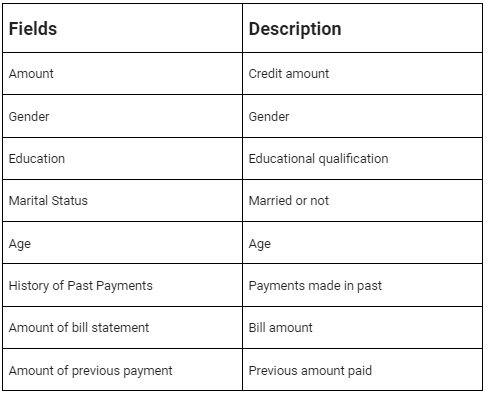

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
uniquer = df[['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']].nunique()
print(uniquer)

0
ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64


In [17]:
# Printing the unique values for each column 
column_list = df.columns.values.tolist()
for column_name in column_list:
   print(f"Unique values in column '{column_name}':")
   print(df[column_name].unique())

Unique values in column 'ID':
[1 2 3 ... 29998 29999 30000]
Unique values in column 'LIMIT_BAL':
[20000 120000 90000 50000 500000 100000 140000 200000 260000 630000 70000
 250000 320000 360000 180000 130000 450000 60000 230000 160000 280000
 10000 40000 210000 150000 380000 310000 400000 80000 290000 340000 300000
 30000 240000 470000 480000 350000 330000 110000 420000 170000 370000
 270000 220000 190000 510000 460000 440000 410000 490000 390000 580000
 600000 620000 610000 700000 670000 680000 430000 550000 540000 1000000
 530000 710000 560000 520000 750000 640000 16000 570000 590000 660000
 720000 327680 740000 800000 760000 690000 650000 780000 730000]
Unique values in column 'SEX':
[2 1]
Unique values in column 'EDUCATION':
[2 1 3 5 4 6 0]
Unique values in column 'MARRIAGE':
[1 2 3 0]
Unique values in column 'AGE':
[24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 7

## 3. ***Data Wrangling***

### Data Wrangling Code

Changing the column names as they are not clear to understand by adding months istead of numbers.

In [18]:
# Write your code to make your dataset analysis ready.
# renaming the pay column
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

# renaming the Bill column
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'},inplace=True)

# renaming the Amount column
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

# renaming the Default column
df.rename(columns={'default payment next month':'default'},inplace=True)

In [19]:
# Rechecking the names
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Correcting columns with unknown values and replacing them accordingly.

In [20]:
#Replacing the value that is unknown to others category
df["EDUCATION"].replace({0:4,5:4,6:4},inplace=True)
df['EDUCATION'].unique()

array([2, 1, 3, 4])

In [21]:
#Replacing the value that is unknown to others category
df["MARRIAGE"].replace({0:3},inplace=True)
df['MARRIAGE'].unique()

array([1, 2, 3])

Changing ting the datatypes to integer only

In [22]:
#converting all columns to int data type
df = df.apply(pd.to_numeric, errors='coerce')

In [23]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   AGE            30000 non-null  int64
 6   PAY_SEPT       30000 non-null  int64
 7   PAY_AUG        30000 non-null  int64
 8   PAY_JUL        30000 non-null  int64
 9   PAY_JUN        30000 non-null  int64
 10  PAY_MAY        30000 non-null  int64
 11  PAY_APR        30000 non-null  int64
 12  BILL_AMT_SEPT  30000 non-null  int64
 13  BILL_AMT_AUG   30000 non-null  int64
 14  BILL_AMT_JUL   30000 non-null  int64
 15  BILL_AMT_JUN   30000 non-null  int64
 16  BILL_AMT_MAY   30000 non-null  int64
 17  BILL_AMT_APR   30000 non-null  int64
 18  PAY_AMT_SEPT   30000 non-null  int64
 19  PAY_

In [49]:
# changing the numerical values to relevant values
df.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 
                'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4: 'others'}, 
                'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'},
            'default' : {1:'defaulter',0:'nondefaulter'}}, inplace = True)

### What all manipulations have you done and insights you found?

1. Renamed the column names to understandable names.
2. Replaced unknown education categories to others.
3. Replaced unknown marriage categories to others.
4. Changes the datatypes to integer only.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Checking the gender distribution

In [50]:
df['SEX'].value_counts()

FEMALE    18112
MALE      11888
Name: SEX, dtype: int64

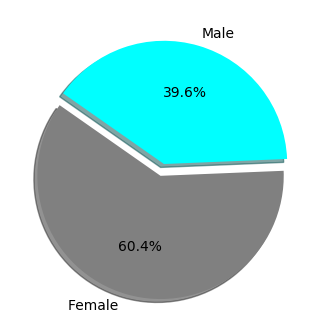

In [51]:
# Chart - 1 visualization code
plt.figure(figsize = (6,4))
plt.pie(x= df['SEX'].value_counts(),explode=(0.1,0.0), colors = ['grey', 'cyan'], autopct='%1.1f%%', shadow=True,startangle = 145,labels = ['Female ','Male'])
plt.show()

##### 1. Why did you pick the specific chart?

It shows the clearly the percentage of gender distribution.

##### 2. What is/are the insight(s) found from the chart?

Gender Female is 60.4% and the rest are male.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will help the company understand which gender is using their product more than the other gender.

#### Chart - 2 Plotting the education categories

In [52]:
# Chart - 2 visualization code
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64

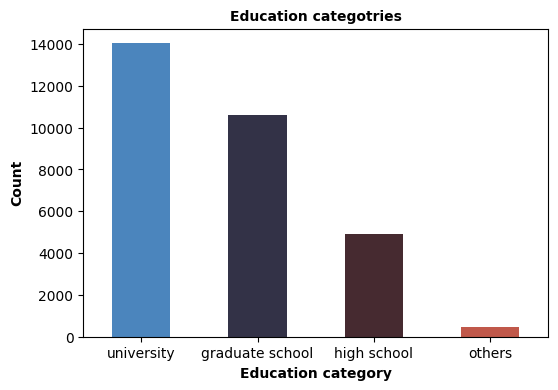

In [53]:
# plotting using count plot
plt.figure(figsize=(6,4))
ax=sns.countplot(x='EDUCATION',data = df,width = 0.5,palette = 'icefire')
ax.set_xlabel('Education category',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Education categotries",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot makes it easy to get the number of all unique variables and there count.

##### 2. What is/are the insight(s) found from the chart?

Following is the order of education University **>** Graduate School **>** High School **>** others

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight will help the company understand the customers education level.

#### Chart - 3 Plotting the default column

In [54]:
# Chart - 3 visualization code
df['default'].value_counts()

nondefaulter    23364
defaulter        6636
Name: default, dtype: int64

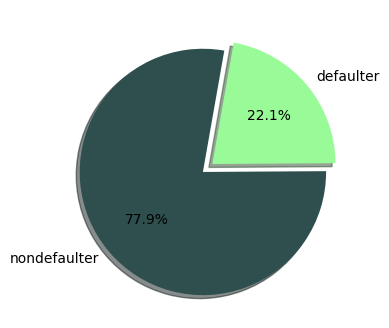

In [74]:
# Plotting the values using
plt.figure(figsize = (6,4))
plt.pie(x= df['default'].value_counts(),explode=(0.1,0.0), colors = ['darkslategray', 'palegreen'], autopct='%1.1f%%', shadow=True,startangle = 80
        ,labels = ['nondefaulter','defaulter'])
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is best to use when differentiating between two values.

##### 2. What is/are the insight(s) found from the chart?

There are 22.1% of the customer who have the risk of default.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the number of people who are default prone is high, the company may move towards loss.

#### Chart - 4 Checking the marital status of customer

In [76]:
# Printing the values
df['MARRIAGE'].value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

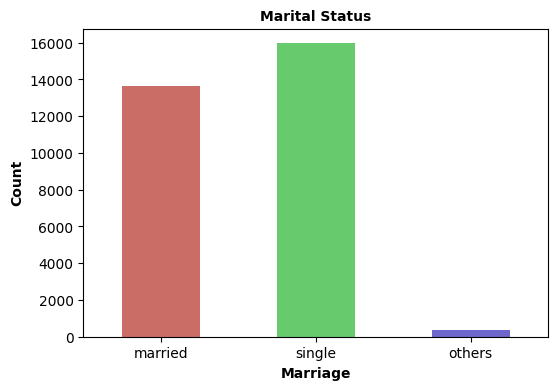

In [98]:
# Plotting using count plot
plt.figure(figsize=(6,4))
ax=sns.countplot(x=df['MARRIAGE'],palette = 'hls',width = 0.5)
ax.set_xlabel('Marriage',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Marital Status",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot makes it easy to get the number of all unique variables and there count.

##### 2. What is/are the insight(s) found from the chart?

Maximum number of customers are single.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It can help company understand which category is less prone to default.

#### Chart - 5 Plotting the age distribution

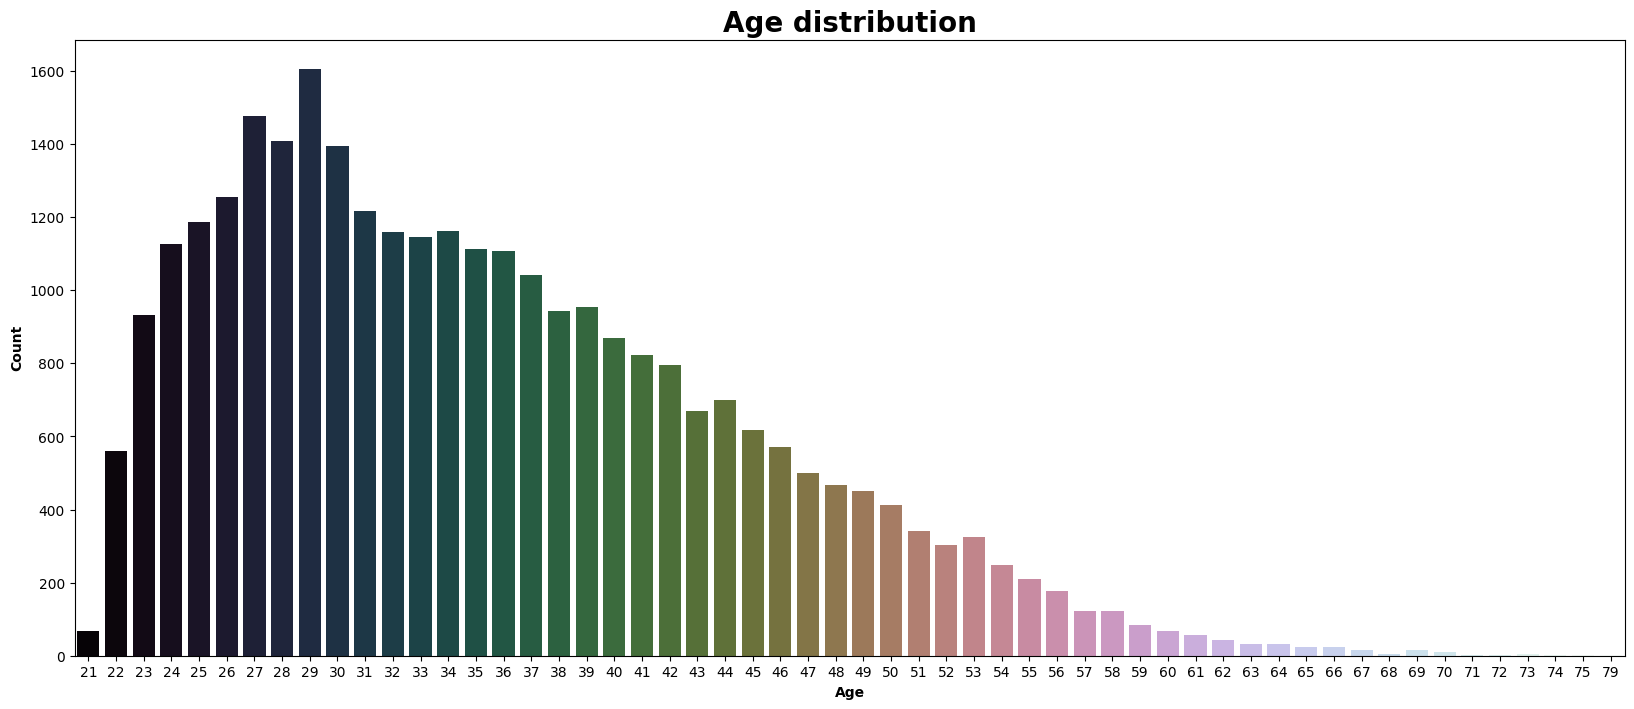

In [117]:
# Chart - 5 visualization code
plt.figure(figsize=(20,8))
ax = sns.countplot(x = 'AGE', data = df,palette = "cubehelix")
ax.set_xlabel('Age',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Age distribution",fontsize=20,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot gives correct count of all the unique variables in one graph.

##### 2. What is/are the insight(s) found from the chart?

Most of the customers are of age group 25 years to 35 years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help company to know which age group is more prone to default.

#### Chart - 6 Age and default comparison

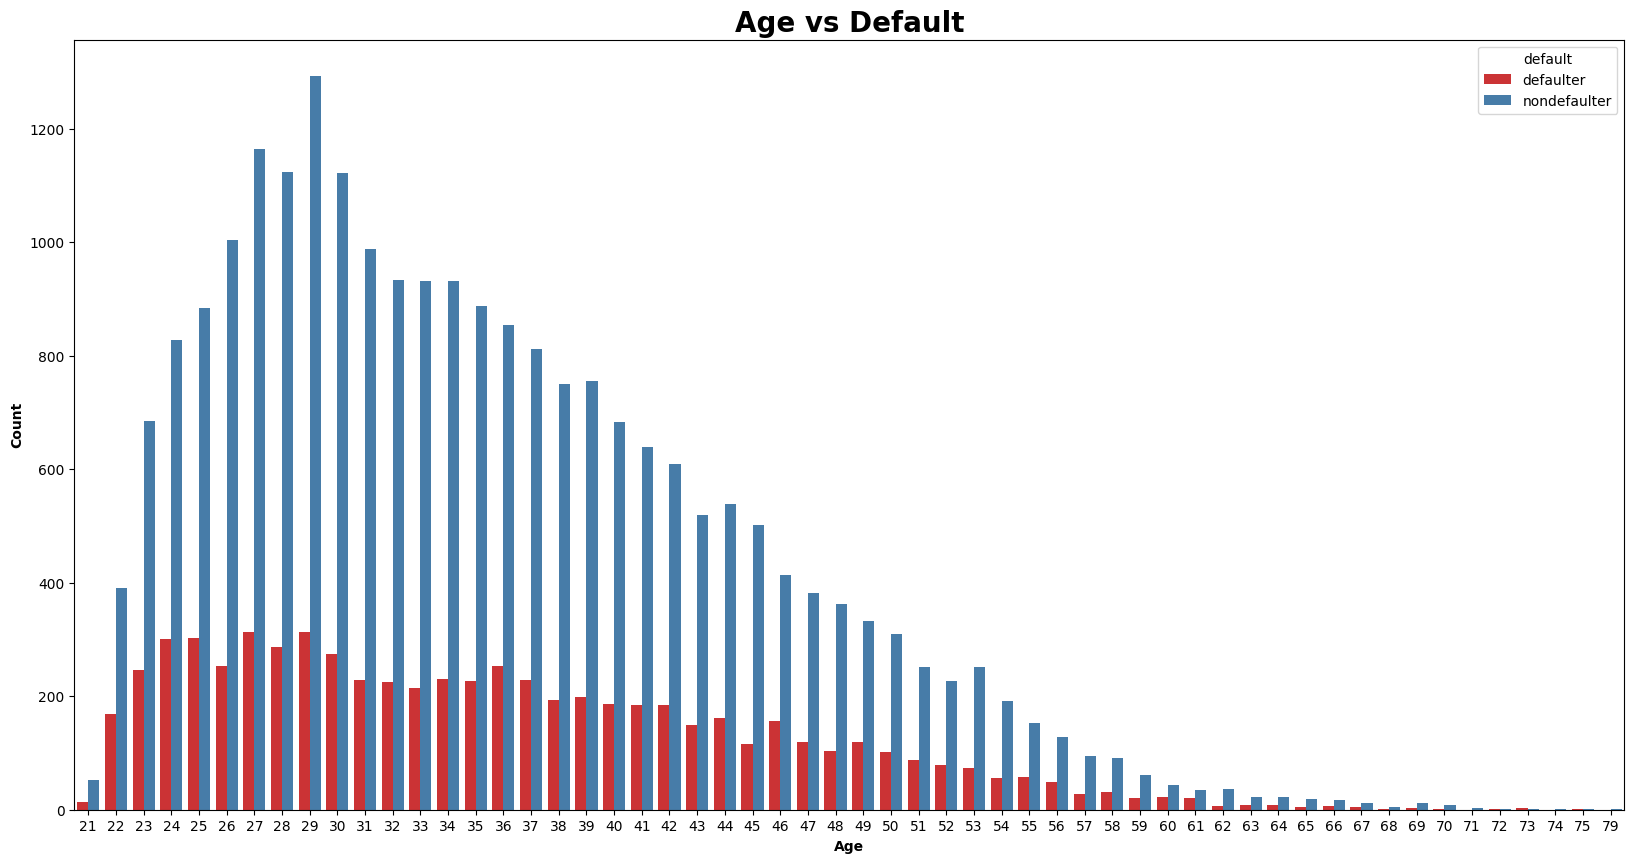

In [152]:
# Chart - 6 visualization code
#Age VS defaults
plt.figure(figsize=(20,10))
ax=sns.countplot(x='AGE',hue='default',data=df,palette="Set1")
ax.set_xlabel('Age',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Age vs Default",fontsize=20,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot makes it easy to get the number of all unique variables and there count.

##### 2. What is/are the insight(s) found from the chart?

Ages from 24 to 30 are having majority of the defaulters. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help the to segregate the age group for defaulters.

#### Chart - 7 Gender and default comparison 

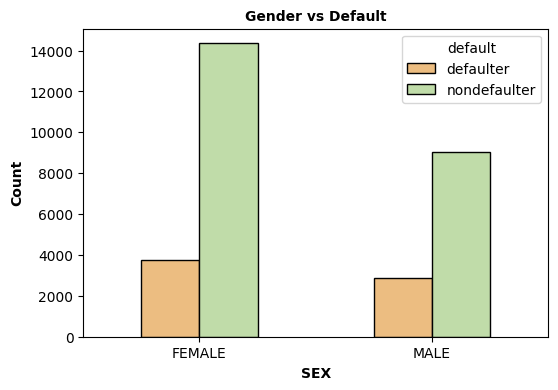

In [165]:
# Plotting using countplot
plt.figure(figsize=(6,4))
ax=sns.countplot(x='SEX',hue='default',data=df,palette="Spectral",width = 0.5, edgecolor = 'black')
ax.set_xlabel('SEX',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Gender vs Default",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot is one of the best plots to use for bivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

Females have more defaulters than males.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help the company know which gender has more default probability.

#### Chart - 8 Marital status and default comparison

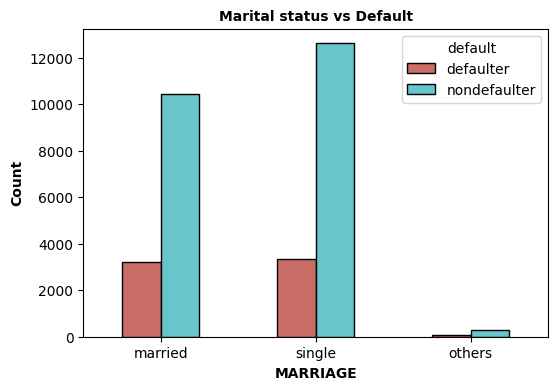

In [169]:
# Chart - 8 visualization code
plt.figure(figsize=(6,4))
ax=sns.countplot(x='MARRIAGE',hue='default',data=df,palette="hls",width = 0.5, edgecolor = 'black')
ax.set_xlabel('MARRIAGE',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Marital status vs Default",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot is one of the best plots to use for bivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

Singles have more defaulters than married customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will help company make informed decisions about whether married or single people are more prone to default.

#### Chart - 9 Education vs default

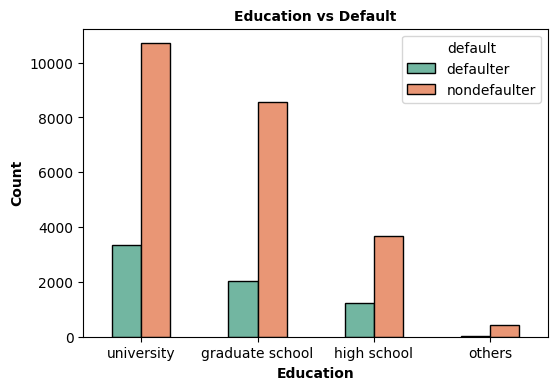

In [186]:
# Chart - 9 visualization code
plt.figure(figsize=(6,4))
ax=sns.countplot(x='EDUCATION',hue='default',data=df,palette="Set2",width = 0.5, edgecolor = 'black')
ax.set_xlabel('Education',size=10,fontdict={"weight": "bold"})
ax.set_ylabel('Count',size=10,fontdict={"weight": "bold"})
ax.set_title("Education vs Default",fontsize=10,fontdict={"weight": "bold"})
plt.show()

##### 1. Why did you pick the specific chart?

Count plot is one of the best plots to use for bivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

University graduates are more defaulters than graduate school and high school.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help company to know what is the education level of most of the defaulters.

#### Chart - 10 Plotting all the discrete features

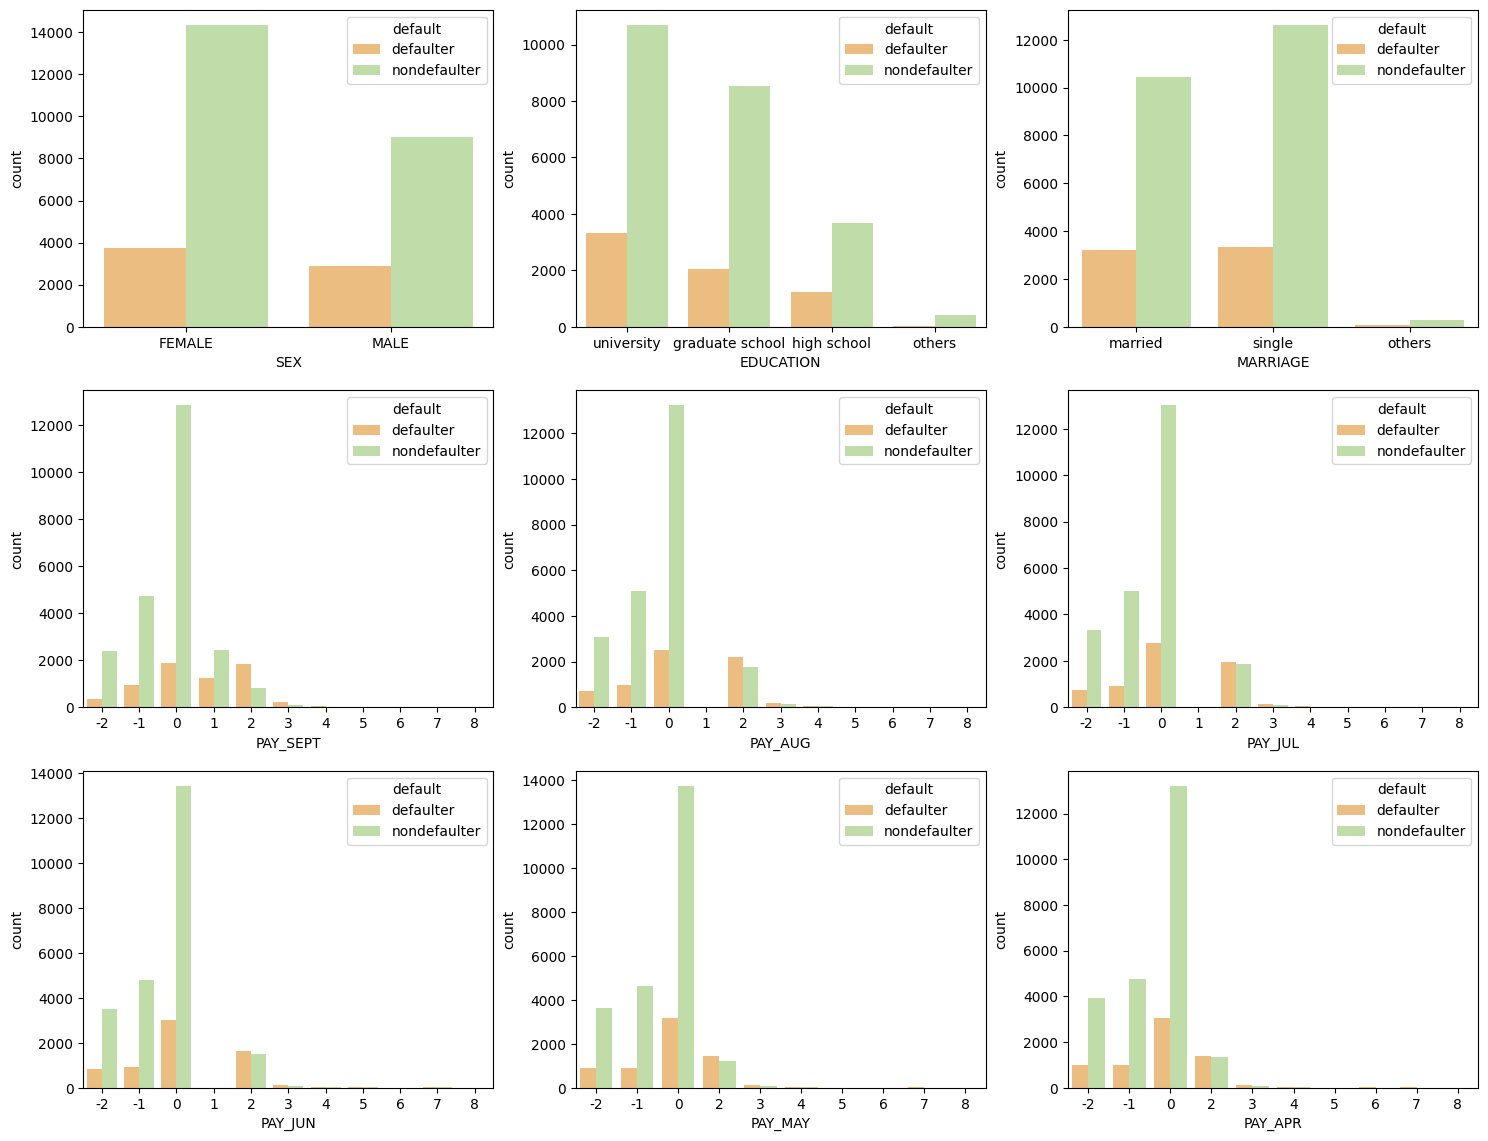

In [191]:
# Chart - 10 visualization code
# List of dicrete features
categorical_columns = ['SEX','EDUCATION','MARRIAGE','PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']

# plotting
fig = plt.figure(figsize=(18,14))
for plot in range(len(categorical_columns)):
  col=categorical_columns[plot]
  sub=fig.add_subplot(3,3,plot+1)
  chart = sns.countplot(data=df,x=col,hue='default',palette='Spectral')

##### 1. Why did you pick the specific chart?

It shows various charts as part of one chart.

##### 2. What is/are the insight(s) found from the chart?

This chart shows insights related to all the discrete features of the dataset. and it also shows the monthly default values.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights will help the company make informed decisions.

#### Chart - 11 Plotting the continuous features

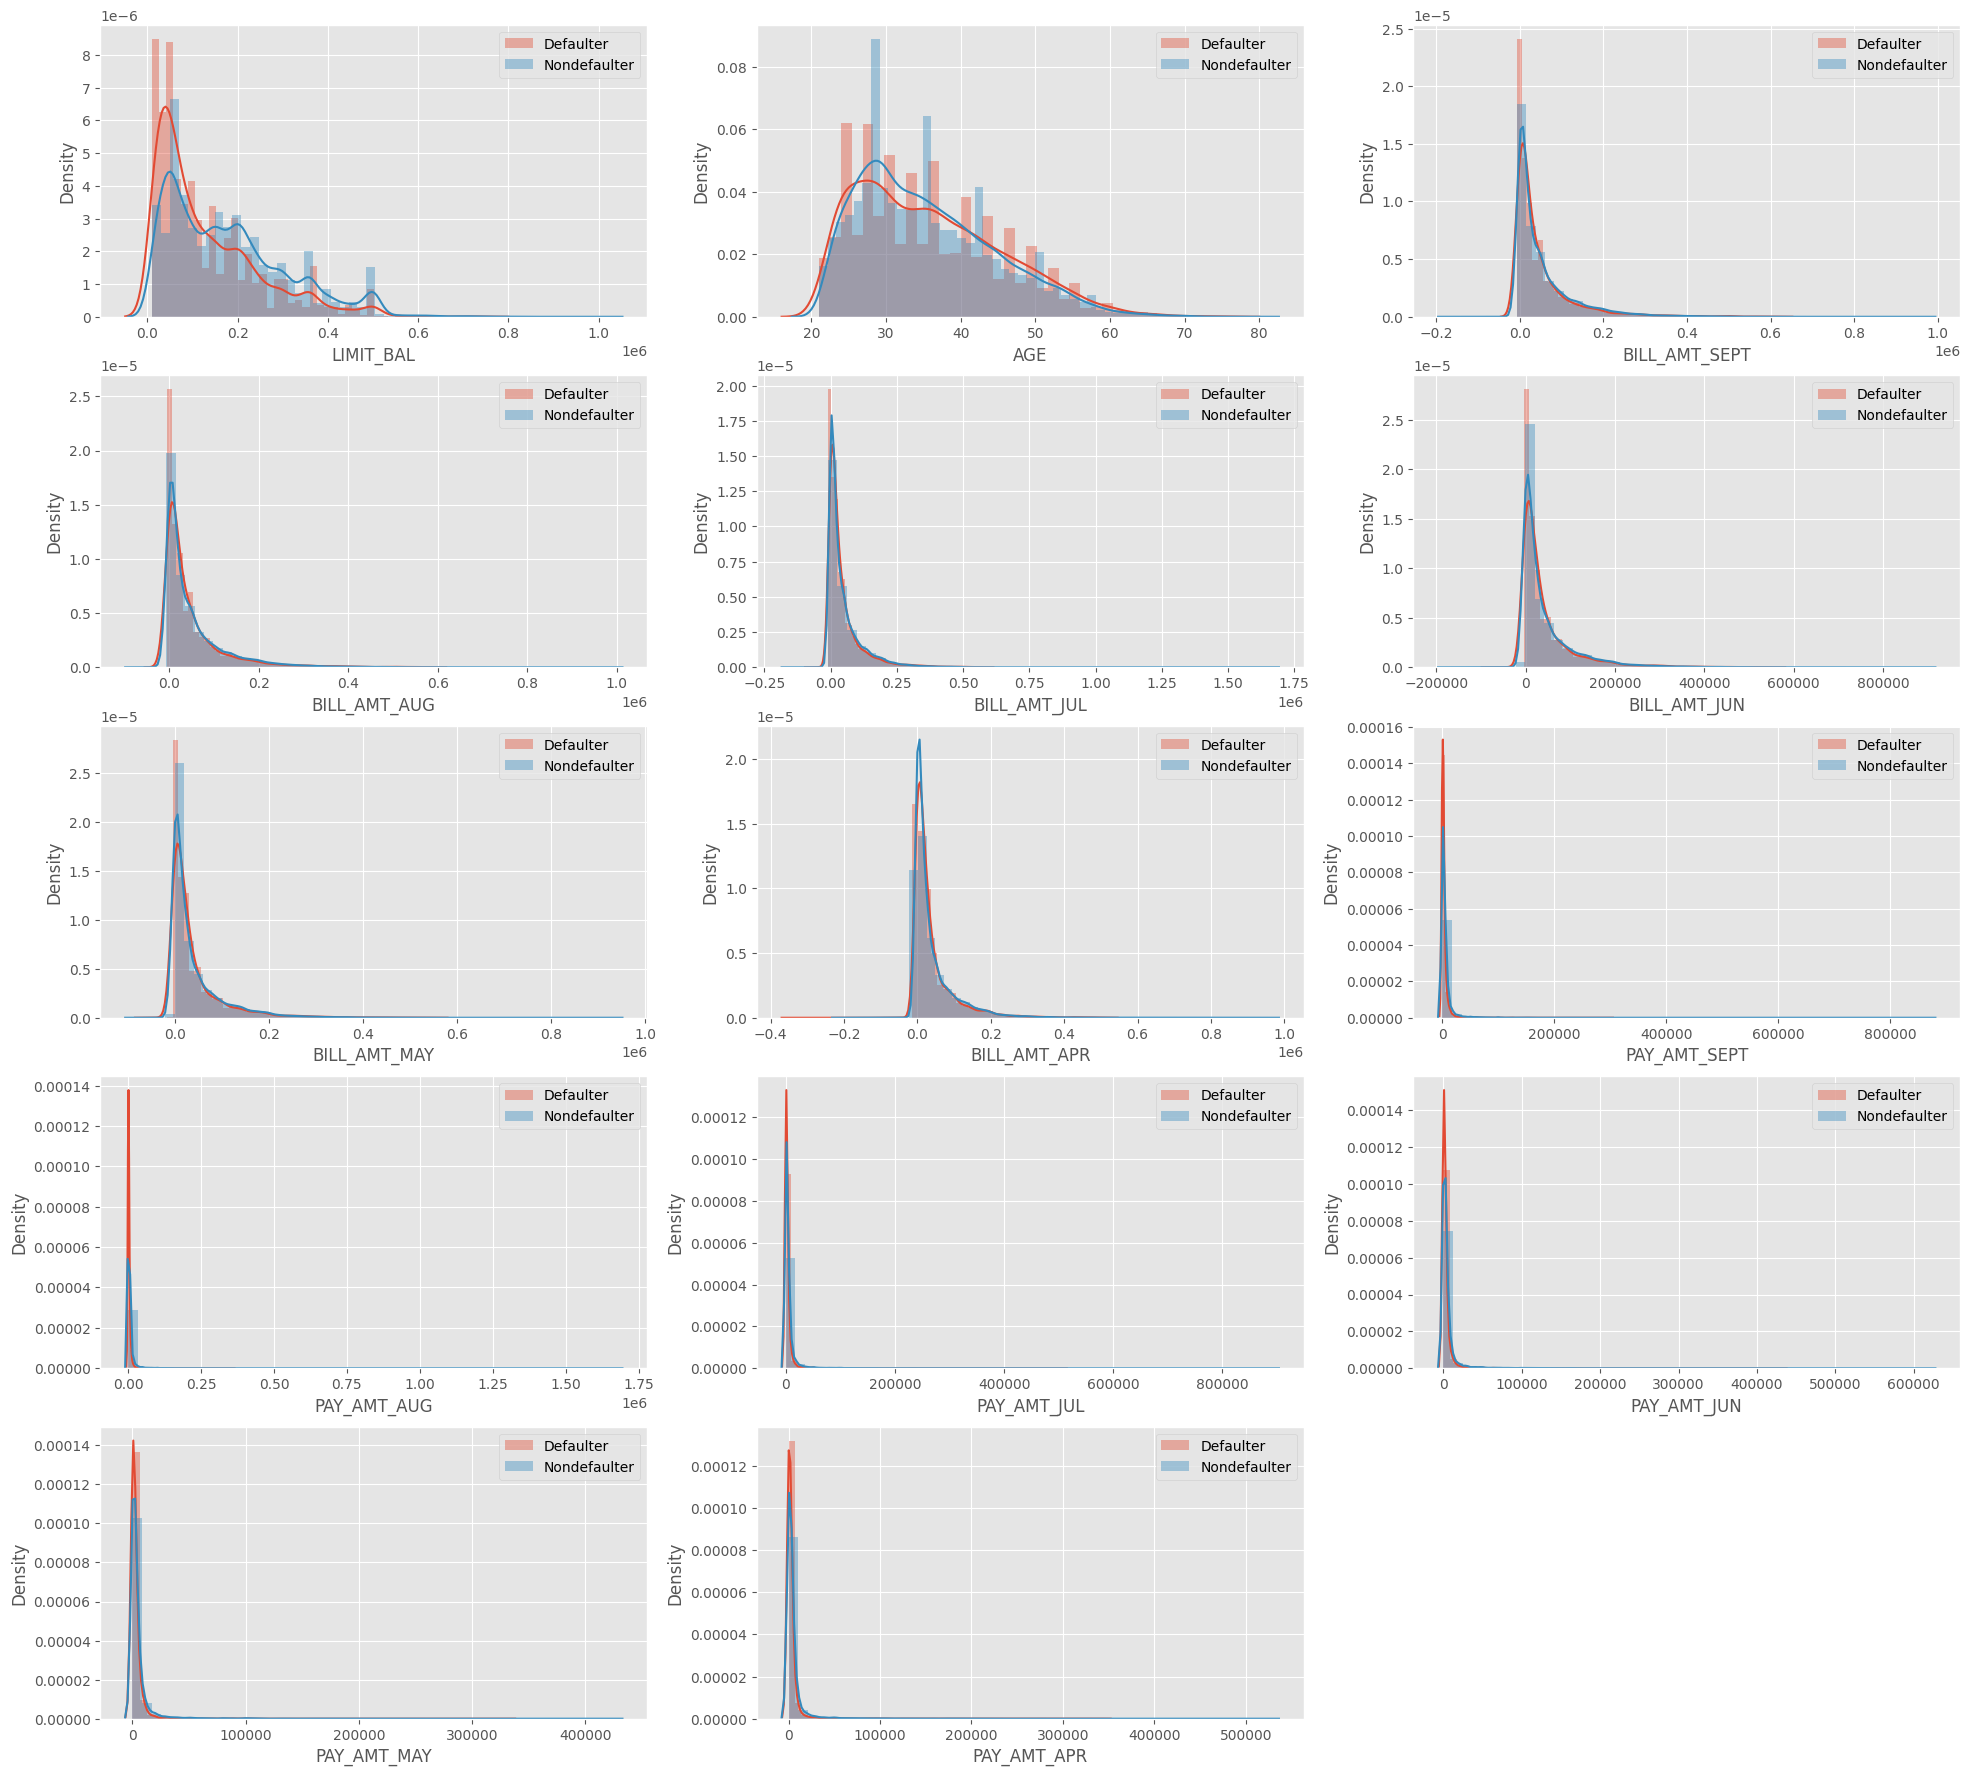

In [200]:
# Chart - 11 visualization code
#List of continuous features
con_column = ['LIMIT_BAL','AGE','BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
# Visualizing Graph for distribution of continuous features
plt.style.use('ggplot')
fig = plt.figure(figsize=(24,22))
for i in range(len(con_column)):
  col=con_column[i]
  sub=fig.add_subplot(5,3,i+1)
  ax = sns.distplot(df[df.columns].loc[df['default'] == 'defaulter', col],label='Defaulter')
  ax = sns.distplot(df[df.columns].loc[df['default'] == 'nondefaulter', col],label='Nondefaulter')
  plt.legend()

##### 1. Why did you pick the specific chart?

Distribution plot is used to plot various features of the dataset.

##### 2. What is/are the insight(s) found from the chart?

Accounts with lower limit have higher rate of default as compared to higher credit limit accounts.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will help regulate the credit limit.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

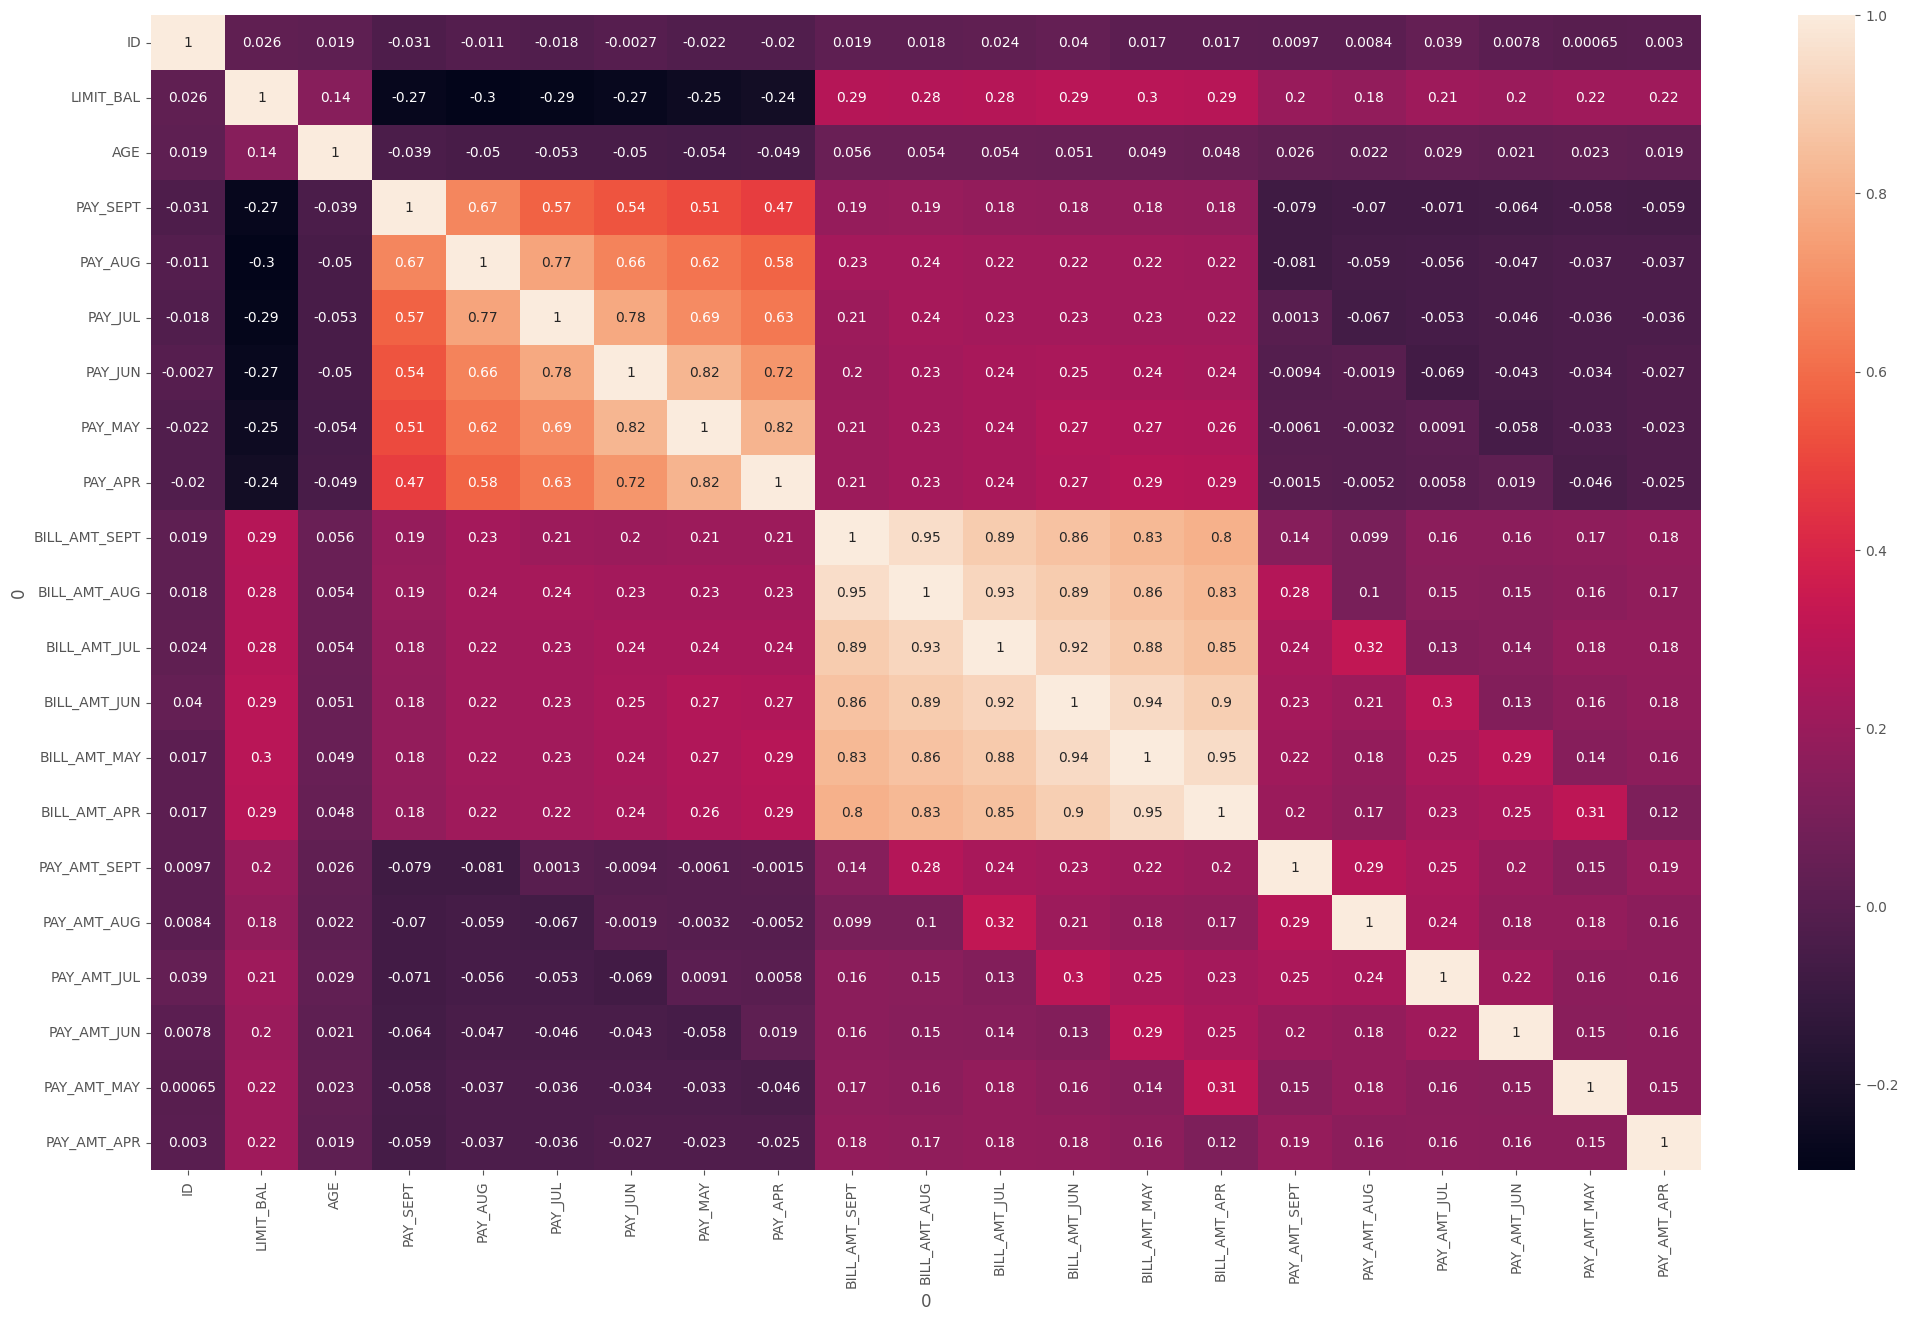

In [201]:
# Correlation Heatmap visualization code
plt.figure(figsize = [25, 15])
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmap is used to plot the correlation between the parameters of the dataset.

##### 2. What is/are the insight(s) found from the chart?

There isn't a clear correlation between the parameters.

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code
sns.set_style("whitegrid", {'axes.grid' : False})
PairPlot=df[['LIMIT_BAL','AGE','BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN',
       'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR','default']].copy()
pp=sns.pairplot(PairPlot,hue='default')
pp.fig.set_size_inches(20,20)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***